# K Nearest Neighbors com Python


## Importando os módulos necessários



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Obter dados

    - index_col = 0 para usar a primeira coluna como índice.

In [2]:
df = pd.read_csv("Classified Data",index_col=0)

In [3]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
WTT             1000 non-null float64
PTI             1000 non-null float64
EQW             1000 non-null float64
SBI             1000 non-null float64
LQE             1000 non-null float64
QWG             1000 non-null float64
FDJ             1000 non-null float64
PJF             1000 non-null float64
HQE             1000 non-null float64
NXJ             1000 non-null float64
TARGET CLASS    1000 non-null int64
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


In [5]:
df.describe()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


## Normalizar as variáveis

Como o classificador KNN prediz a classe de uma determinada observação ao identificar as observações mais próximas, a escala da variável é importante. Todas as variáveis que estão em grande escala terão um efeito muito maior na distância entre as observações e, portanto, sobre o classificador KNN, do que as variáveis em pequena escala.

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
scaler = StandardScaler()

** Dropando a coluna de TARGET CLASS **

In [8]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

<br>
### Transformando o dataset, centralizando os elementos conforme o scaler foi treinado

In [9]:
df_normalizado = scaler.transform(df.drop('TARGET CLASS',axis=1))

#retorna um array numpy
df_normalizado

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [10]:
# Transforma o array numpy em um dataframe

df_parametros = pd.DataFrame(df_normalizado,columns=df.columns[:-1])
df_parametros.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


## Divisão treino-teste

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df_normalizado,df['TARGET CLASS'],
                                                    test_size=0.30)

## Usando o KNN


In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
knn = KNeighborsClassifier(n_neighbors=1)

In [15]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [16]:
pred = knn.predict(X_test)

## Previsões e avaliações

Vamos avaliar o nosso modelo KNN!

In [17]:
from sklearn.metrics import classification_report,confusion_matrix

In [18]:

# Matriz Confusão
pd.DataFrame(confusion_matrix(y_test,pred), columns= '1 0'.split(), index='1 0'.split())

,1,0
1,141,12
0,12,135


In [19]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       153
           1       0.92      0.92      0.92       147

   micro avg       0.92      0.92      0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



# Escolhendo um valor K

Vamos em frente e usar o método do cotovelo para escolher um bom Valor K:

Text(0,0.5,'TAXA DE ERRO')

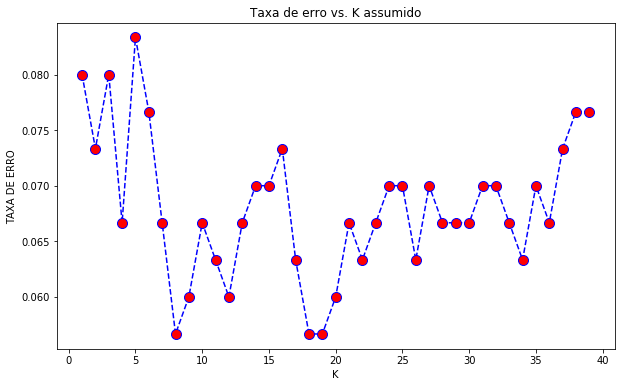

In [20]:
# Primeiro método
from sklearn.metrics import accuracy_score

err_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    predict = knn.predict(X_test)
    m = confusion_matrix(y_test, predict)
    
    # calcular TrueNegative + FalseNegative / total, para termos a quantidade em porcentagem de erro    
    err = (m[0][1]+ m[1][0]) / ( m[0][0] + m[0][1] + m[1][0]+ m[1][1] )
    err_rate.append(err)
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),
         err_rate,
         color='blue', 
         linestyle='dashed', 
         marker='o',
         markerfacecolor='red', 
         markersize=10)

plt.title('Taxa de erro vs. K assumido')
plt.xlabel('K')
plt.ylabel('TAXA DE ERRO')

In [21]:

# Segundo método

error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0,0.5,'TAXA DE ERRO')

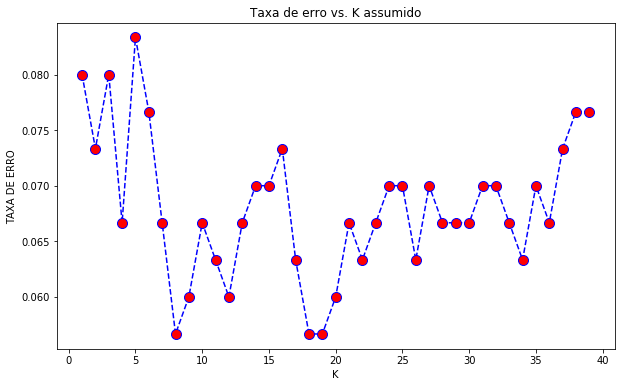

In [22]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),
         error_rate,
         color='blue', 
         linestyle='dashed', 
         marker='o',
         markerfacecolor='red', 
         markersize=10)

plt.title('Taxa de erro vs. K assumido')
plt.xlabel('K')
plt.ylabel('TAXA DE ERRO')

Aqui podemos ver que, após cerca de K > 23, a taxa de erro tende a girar em torno de 0,06-0,05. Vamos treinar novamente o modelo com isso e verificar o relatório de classificação!

In [23]:
# PRIMEIRA COMPARAÇÃO RÁPIDA PARA O NOSSO ORIGINAL K = 1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(classification_report(y_test,pred))
pd.DataFrame(confusion_matrix(y_test,pred), columns= '1 0'.split(), index='1 0'.split())

WITH K=1


              precision    recall  f1-score   support

           0       0.92      0.92      0.92       153
           1       0.92      0.92      0.92       147

   micro avg       0.92      0.92      0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300



,1,0
1,141,12
0,12,135


In [28]:
# Agora com K = 8, segundo o método do cotovelo, é o melhor valor de K, 
# e o calclo de áreas será menor

knn = KNeighborsClassifier(n_neighbors=8)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('Com K=22')
print('\n')
print(classification_report(y_test,pred))
pd.DataFrame(confusion_matrix(y_test,pred), columns= '1 0'.split(), index='1 0'.split())

Com K=22


              precision    recall  f1-score   support

           0       0.94      0.95      0.94       153
           1       0.95      0.94      0.94       147

   micro avg       0.94      0.94      0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



,1,0
1,145,8
0,9,138


Conseguimos extrair mais algum desempenho do nosso modelo, ajustando-nos para um melhor valor K!